In [46]:
import pandas as pd
import numpy as np

In [47]:
df = pd.read_csv("mood_data.csv")
feature_cols = [
    'sleep_hours', 'stress_level', 'exercise_minutes',
    'nutrition_quality', 'social_minutes', 'water_liters', 'caffeine_cups'
]
target_col = 'mood_score'

X = df[feature_cols].values   # shape (n_samples, n_features)
y = df[target_col].values     # shape (n_samples,)

y = m * x + b

to 

y = w₁·x₁ + w₂·x₂ + ... + wₙ·xₙ + b


In [48]:
class MultVarLinearRegressionModel:
    def __init__(self):
        self.weights = None # holds weights w1,w2,w3,wn
        self.bias = 0       # Intercept term (b)


    # This uses matrix math (called the Normal Equation) to find the best weights.
    def fit(self, X, y): 
        """
        Fit the model using the Normal Equation:
        w = (X^T X)^-1 X^T y
        """
        ones = np.ones((X.shape[0], 1))        # Column of 1s to simulate bias term
        X_b = np.hstack([ones, X])             # Augmented X with bias term
        X_transpose = X_b.T

        self.theta = np.linalg.inv(X_transpose @ X_b) @ X_transpose @ y

        self.bias = self.theta[0]              # First value = intercept
        self.weights = self.theta[1:]          # Rest = weights for each feature

    def predict(self, X):
        """
        Predict using:
        y_pred = X * w + b
        """
        return X @ self.weights + self.bias 
        # No longer loop manually, instead, this uses NumPy to predict in bulk using matrix multiplication.


    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)



### Bias and Ones Matrix (for Matrix Regression)

**bias** = shifts the entire prediction up or down.

We want to create a ones matrix.

Here, I'm simulating 2 sample rows with 7 features.

In this case, `X_test.shape[0]` creates 1 bias for each row,  
generating a matrix with 2 rows and 1 column of ones.

---

#### Why do this?

Because the bias/intercept term **b** in a regression model isn't multiplied by a feature it's just added at the end:

y = w1x1 + w1x2 + ... + 2nxn + b

To represent this using matrix multiplication, we trick the math by turning **b** into a weight of 1s:

y = θ0*1 + θ1x1 + ... + θnxn

So basically:

so basically θ0 = b


In [49]:
X_test = np.array([[7, 3, 30, 8, 60, 2, 1],
                   [6, 5, 20, 7, 50, 1.5, 2]])
y_test = np.array([8, 7])
one_m_test = np.ones((X_test.shape[0], 1)) # shape 2,1
print(f"{one_m_test}")


[[1.]
 [1.]]


Combine ones array and then transpose it

In [50]:
X_b_test = np.hstack([one_m_test, X_test])    

print(f"{X_b_test}")
print(f"{X_b_test.shape}")

[[ 1.   7.   3.  30.   8.  60.   2.   1. ]
 [ 1.   6.   5.  20.   7.  50.   1.5  2. ]]
(2, 8)


In [51]:
X_b_transposed = X_b_test.T
print(f"{X_b_transposed}")
print(f"\n{X_b_transposed.shape}")

[[ 1.   1. ]
 [ 7.   6. ]
 [ 3.   5. ]
 [30.  20. ]
 [ 8.   7. ]
 [60.  50. ]
 [ 2.   1.5]
 [ 1.   2. ]]

(8, 2)


@ is for matrix multiplication

its the same as np.dot() but more cleaner for this case

nwo that we have everything prepared, then we can do normal equation 

Xt * X = Xt @ X

(Xt @ X)^-1 = np.linalg.inv(Xt @ X)

only square matrices can be inverted

then we multiply all of this with y which are our outputs


In [52]:
theta_test = (X_b_transposed @ X_b_test) @ X_b_transposed @ y_test

resulting in theta, holding all the learned values, [bias, w1, ..., wn]

These values control:

Example if the mode learns w_sleep = 0.6 and w_stress = - 0.8 then:
- Increasing sleep by 1 hour increases mood by 0.6
- increasing stress by 1 unit decreases mood by 0.8

so mood = b + w1x1 + w2x2 + ... + wnwn

In [53]:
bias_test = theta_test[0]  # First value = intercept
weights_test = theta_test[1:]  # Rest = weights for each feature
print(f"Bias: {bias_test}")
print(f"Weights: {weights_test}")

Bias: 113929.75
Weights: [ 746635.5    443534.75  2909165.     860565.25  6327057.5    202423.125
  164802.5  ]


# Training model

In [54]:
df = pd.read_csv("mood_data.csv")
feature_cols = [
    'sleep_hours', 'stress_level', 'exercise_minutes',
    'nutrition_quality', 'social_minutes', 'water_liters', 'caffeine_cups'
]
target_col = 'mood_score'

X = df[feature_cols].values   # shape (n_samples, n_features)
y = df[target_col].values     # shape (n_samples,)

In [55]:
model = MultVarLinearRegressionModel()
model.fit(X, y)


# y_predicted = x1*w1 + x2*w2 + x3*w3 + ... + xn*wn + b 

print(f"Bias: {model.bias}")
print(f"Weights: {model.weights}")


Bias: 1.0258069480228795
Weights: [ 0.46671372 -0.57156481 -0.00405049  0.45024843  0.00071675  0.23054032
 -0.14547289]


In [56]:
y_pred = model.predict(X)
print(f"Predictions: {y_pred}")

Predictions: [ 4.78195539  6.63945969  6.08953086  4.67873358  5.77032478  4.46546179
  1.20270522  4.78776936  4.94498099  5.73711148  3.72742663  5.74789121
  4.57195588  4.82488842  3.15470776  4.69358508  5.89050165  6.50573941
  5.55936975  6.54497113  4.96454153  2.58067025  0.80981021  6.93383163
  3.8254753   3.04364708  2.05600717  4.11333501  3.8768465   2.02024099
  3.22149382  4.4904194   3.14426194  6.36773534  2.41661469  6.02629042
  4.09098894  6.16114946  3.26275144  6.33632048  6.63129474  4.58023228
  2.54128279  5.4697083   5.60949568  6.72909154  4.35212273  4.62711384
  5.57110858  6.59387291  5.24640643  5.27600947  6.02337726  5.43262736
  5.11175782  1.34576175  6.06394157  2.93411267  2.59567668  6.02805657
  5.54983137  4.38533658  5.16170369  3.98596839 -0.10133126  5.38637171
 -0.27563329  2.94077924  1.17303664  0.40955327  3.1456929   1.71226447
  6.41172114  4.39854617  6.84510886  0.0199222   4.52201066  4.09704247
  1.35335631  3.36026454  4.39683562  

In [57]:
mse = model.mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.8381127202046004
Root Mean Squared Error: 0.9154849644885493


Mse of 0.83 is not bad, but I want a better result, like ~0.5

Root mean squared error give us the average error in natural units, 1 or less 

# drop caffeine col

In [58]:
feature_cols = [
    'sleep_hours', 'stress_level', 'exercise_minutes',
    'nutrition_quality', 'social_minutes', 'water_liters'
]
target_col = 'mood_score'

X = df[feature_cols].values   # shape (n_samples, n_features)
y = df[target_col].values     # shape (n_samples,)

print(f"{X.shape}")
print(f"{y.shape}")

(100, 6)
(100,)


In [59]:
model.fit(X, y)

print(f"Bias: {model.bias}")
print(f"Weights: {model.weights}")


y_pred = model.predict(X)
print(f"Predictions: {y_pred}")

Bias: 0.5774492862682414
Weights: [ 0.47737341 -0.55894882 -0.00173356  0.46069368  0.00120421  0.23124395]
Predictions: [ 4.8980639   6.48624366  6.26535351  4.64765729  5.73044863  4.43167224
  1.27321758  4.91304798  5.15841922  5.62479855  3.72194319  5.57219846
  4.46411748  4.81618693  3.08605256  4.86113111  5.73072917  6.6029688
  5.5765703   6.68094706  5.09250024  2.56624618  0.97573892  6.85937739
  3.61909595  3.11050412  2.26682684  4.28735398  3.97928589  2.35106678
  3.02550424  4.50381888  3.27340118  6.16676304  2.38998644  6.1802742
  4.07526685  6.04333023  3.21924318  6.17127336  6.56911134  4.57658414
  2.36902019  5.43183128  5.57949856  6.87727907  4.33150774  4.55299816
  5.75748273  6.45946631  5.30539612  5.32184151  5.97690458  5.26552817
  4.93675992  1.27718995  6.17218589  2.91839609  2.36653851  6.12524965
  5.7124816   4.24300437  5.03593298  3.98847588 -0.09485614  5.37951539
 -0.09533577  2.73416288  1.18122149  0.41032859  2.94561728  1.46943215
  6.5

In [60]:
mse = model.mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.8546821914717009
Root Mean Squared Error: 0.9244902333024946


looping through each value to drop it and test prediction

In [62]:
for col in feature_cols:
    temporal_features = feature_cols.copy()
    temporal_features.remove(col)
    X_temp = df[temporal_features].values  # shape (n_samples, n_features)

    model.fit(X_temp, y)
    predictions = model.predict(X_temp)
    mse = model.mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    print(f"Without {col} MSE: {mse:.4f}")
    print(f"Without {col} RMSE: {rmse:.4f}\n")


Without sleep_hours MSE: 0.9810
Without sleep_hours RMSE: 0.9904

Without stress_level MSE: 1.0360
Without stress_level RMSE: 1.0178

Without exercise_minutes MSE: 0.8549
Without exercise_minutes RMSE: 0.9246

Without nutrition_quality MSE: 1.0562
Without nutrition_quality RMSE: 1.0277

Without social_minutes MSE: 0.8568
Without social_minutes RMSE: 0.9256

Without water_liters MSE: 0.8597
Without water_liters RMSE: 0.9272



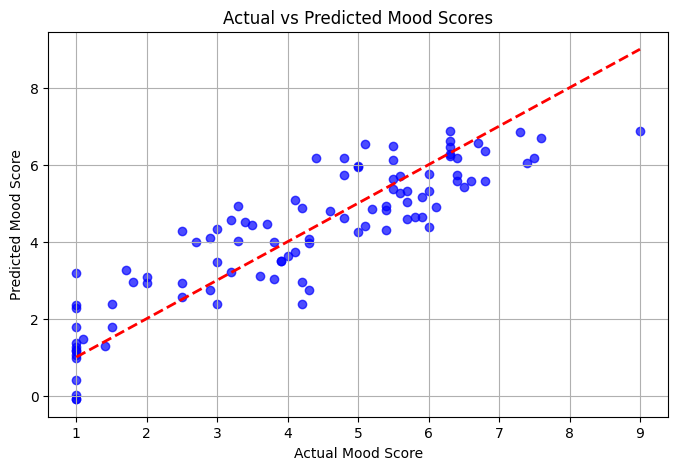

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(y, y_pred, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Diagonal line
plt.title("Actual vs Predicted Mood Scores")
plt.xlabel("Actual Mood Score")
plt.ylabel("Predicted Mood Score")
plt.grid(True)
plt.show()

Re train the model with 7 variables and 

In [69]:
feature_cols = [
    'sleep_hours', 'stress_level', 'exercise_minutes',
    'nutrition_quality', 'social_minutes', 'water_liters', 'caffeine_cups'
]
target_col = 'mood_score'

X = df[feature_cols].values   # shape (n_samples, n_features)
y = df[target_col].values     # shape (n_samples,)

model.fit(X, y)
print(f"Bias: {model.bias}")
print(f"Weights: {model.weights}")

y_pred = model.predict(X)
print(f"Predictions: {y_pred}")

mse = model.mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Bias: 1.0258069480228795
Weights: [ 0.46671372 -0.57156481 -0.00405049  0.45024843  0.00071675  0.23054032
 -0.14547289]
Predictions: [ 4.78195539  6.63945969  6.08953086  4.67873358  5.77032478  4.46546179
  1.20270522  4.78776936  4.94498099  5.73711148  3.72742663  5.74789121
  4.57195588  4.82488842  3.15470776  4.69358508  5.89050165  6.50573941
  5.55936975  6.54497113  4.96454153  2.58067025  0.80981021  6.93383163
  3.8254753   3.04364708  2.05600717  4.11333501  3.8768465   2.02024099
  3.22149382  4.4904194   3.14426194  6.36773534  2.41661469  6.02629042
  4.09098894  6.16114946  3.26275144  6.33632048  6.63129474  4.58023228
  2.54128279  5.4697083   5.60949568  6.72909154  4.35212273  4.62711384
  5.57110858  6.59387291  5.24640643  5.27600947  6.02337726  5.43262736
  5.11175782  1.34576175  6.06394157  2.93411267  2.59567668  6.02805657
  5.54983137  4.38533658  5.16170369  3.98596839 -0.10133126  5.38637171
 -0.27563329  2.94077924  1.17303664  0.40955327  3.1456929   1

In [71]:
input_data = {
    'sleep_hours': [6.5],
    'stress_level': [2],
    'exercise_minutes': [20],
    'nutrition_quality': [5],
    'social_minutes': [45],
    'water_liters': [2],
    'caffeine_cups': [1]
}
input_df = pd.DataFrame(input_data)

predicted_mood = model.predict(input_df[feature_cols].values)
print(f"Predicted Mood Score: {predicted_mood[0]:.2f}")

Predicted Mood Score: 5.43
